<div style="max-width:66ch;">

# Lecture notes - Python summary

This is a lecture note for **python summary**. It contains

- error handling
- file handling
- functions
- matplotlib
- numpy

Note that this is an introduction to the subject, you are encouraged to read further. We will only cover enough fundamental parts that will be useful for this course and the next. 

---

</div>


<div style="max-width:66ch;">

## Error handling 

Process of managing and responding to exceptions or errors that can occur during the execution of a program. Exceptions are events that disrupt the normal flow of a program and can be caused by various factors, such as invalid inputs, file not found, or division by zero.

There are three types of errors in python:

<table style="display:inline-block; text-align:left;">
  <tr style="background-color: #174A7E; color: white;">
    <th>Error type</th>
    <th>Short summary</th>
    <th>Short example</th>
  </tr>
  <tr>
    <td>Syntax errors</td>
    <td>Errors in code syntax; prevent program execution.</td>
    <td><code>if x = 5:</code> (SyntaxError: invalid syntax)</td>
  </tr>
  <tr>
    <td>Runtime errors (Exceptions)</td>
    <td>Errors during program execution due to unforeseen circumstances.</td>
    <td><code>10 / 0</code> (ZeroDivisionError: division by zero)</td>
  </tr>
  <tr>
    <td>Semantic errors (Logical errors)</td>
    <td>Errors in program logic or implementation; code runs but produces incorrect results.</td>
    <td>Incorrect calculation logic in a function.</td>
  </tr>
</table>

</div>

**Syntax error**

- easy to fix 

In [2]:
prin("linear regression is a supervised learning algorithm")

NameError: name 'prin' is not defined

**Runtime error**

- easy to fix

In [3]:
numbers = list(range(5))
numbers[5]

IndexError: list index out of range

**Logical error**

- harder to find as the code runs
- some extensive debugging could be involved here

In [6]:
import numpy as np 

radius = 5

# this is circumference and not the area
area_circle = np.pi*radius
print(f"{area_circle = :.2f}")

area_circle = 15.71


**try-except**

In [3]:
# want user to try again 
while True: 
    try:
        age = float(input("Ange din ålder"))
        if not 0<=age<=125:
            raise ValueError("Åldern måste vara mellan 0 and 125")
        print(f"Du är {age} år gammal")
        break # breaks out of while loop if nothing went wrong
    except ValueError as err:
        print(err)    

Du är 32.0 år gammal


<div style="max-width:66ch;">

---
## Functions

A function is a reusable block of code that performs a specific task or a set of tasks
- break down complex program into smaller parts
- organize code
- make modular code

```
def name(param1, param2, ...): 
    statements
    ...

name(arg1, arg2, ...)
```

</div>

In [26]:
def squarer(x): # input parameter x 
    return x**2 # returns x**2

print(squarer(3))
squares = [squarer(x) for x in range(10)]
print(squares)

9
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


**Default value**

In [31]:
# number_rows = 5 is a default value
def draw_ascii_pattern(number_rows=5):
    for i in range(1, number_rows + 1):
        print(i * "x " + (number_rows - i) * "o ")

    # returns None

draw_ascii_pattern()
draw_ascii_pattern(2)
draw_ascii_pattern(4)

x o o o o 
x x o o o 
x x x o o 
x x x x o 
x x x x x 
x o 
x x 
x o o o 
x x o o 
x x x o 
x x x x 


In [32]:
def smallest(number1, number2):
    if number1 > number2:
        return number2
    return number1
    
smallest(7,2)

2

**Arbitrary arguments, \*args**

In [34]:
def my_mean(*args):
    sum_ = 0 # use sum_ to not override python built-in sum() function 
    for arg in args:
        sum_ += arg
    return sum_/len(args)

print(my_mean(1,2,3,4))

2.5


**Keyword arguments, \*kwargs**

In [51]:
import numpy as np 

def simulate_dices(throws = 1, dices = 2):
    print(np.random.randint(1,7, (throws, dices)))


simulate_dices(throws = 2)

print("\ncan specify second keyword argument as long as first has default value")
simulate_dices(dices = 3)

print("\ndifferent orders")
simulate_dices(dices=3, throws=3)

[[1 4]
 [3 1]]

can specify second keyword argument as long as first has default value
[[6 2 1]]

different orders
[[1 5 3]
 [2 4 6]
 [4 3 6]]


**Unpack arguments**

In [54]:
options_list = [2, 3]
options_dict = dict(dices=3, throws = 2)

simulate_dices(*options_list)

print()
simulate_dices(**options_dict)  





[[6 1 3]
 [1 5 1]]

[[5 4 5]
 [6 1 2]]


**Lambda functions**

- anonymous functions
- can take many arguments but have one expression
- can be used inside another function

In [55]:
cuber = lambda x: x**3
cuber(3)

27

In [58]:
students = [("Alice", 85), ("Bob", 92), ("Charlie", 78), ("David", 95)]

# sort students by their scores in descending order
sorted_students = sorted(students, key=lambda student: student[1], reverse=True)

for student in sorted_students:
    print(f"{student[0]}: {student[1]}")


David: 95
Bob: 92
Alice: 85
Charlie: 78


<div style="max-width:66ch;">

---
## Matplotlib

For creating visualizations in python. 

> There will be much more matplotlib in the future, so just an introduction on how to use it is covered here

</div>

**Plotting (x,y) sequences**

- here we use tuple for x and list of y

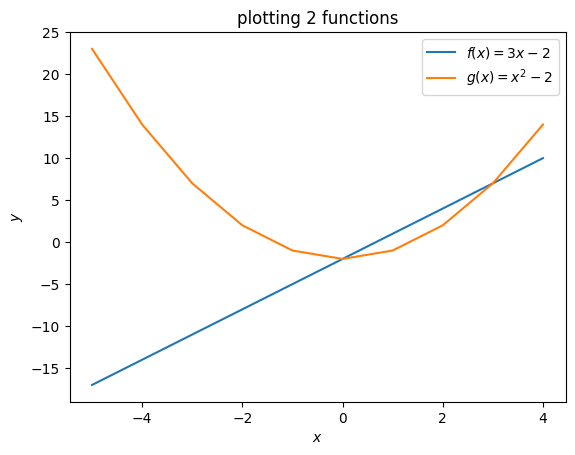

In [95]:
import matplotlib.pyplot as plt

# showing one lambda and one def
f = lambda x: 3 * x - 2


def g(x):
    return x**2 - 2


x = tuple(range(-5, 5))

# note that we need to use list comprehension to generate y's
y = [f(i) for i in x]
y2 = [g(i) for i in x]

# matlab style of plotting, an OOP approach will be shown later
plt.plot(x, y)
plt.plot(x, y2)
plt.title("plotting 2 functions")
plt.xlabel("$x$") # this is LaTeX for typesetting math
plt.ylabel("$y$")
plt.legend(["$f(x)=3x-2$", "$g(x) = x^2-2$"])

# we see that g(x) is jagged, and that's because we don't have enough 
# (x,y) values to make it appear smooth

**Plotting using numpy**

[-3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.5004513
 -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
 -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
 -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
 -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
  2.24399475  2.37222302  2.5004513   2.62867957  2.75690784  2.88513611
  3.01336438  3.14159265]


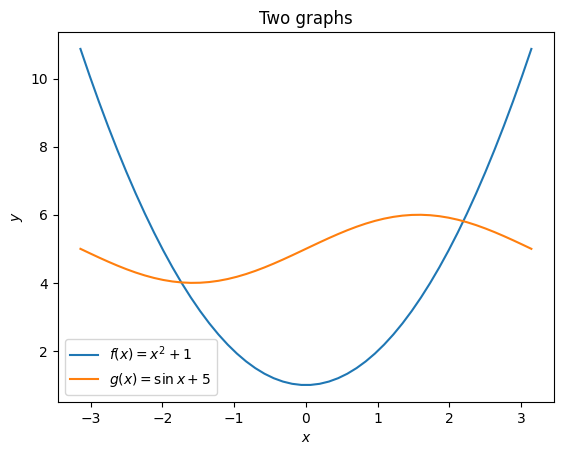

<Figure size 640x480 with 0 Axes>

In [102]:
import numpy as np

x = np.linspace(-np.pi, np.pi)

# gives 50 evenly spaced values between -pi and pi
print(x)
f = lambda x: x**2 + 1
g = lambda x: np.sin(x) + 5

# OOP approach
ax, fig = plt.axes(), plt.figure()

ax.plot(x, f(x), label="$f(x) = x^2+1$")
ax.plot(x, g(x), label="$g(x) = \sin{x} + 5$")
ax.set(title="Two graphs", xlabel="$x$", ylabel="$y$")
ax.legend();

**More on numpy**

In [104]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [103]:

# creating an array from list, it is also a data structure for representing a mathematical vector
vector1 = np.array([2,5,1])
print(f"{vector1=}")
# the multiplication performs element-wise 
print(f"{vector1*2=}") 
# note the difference in list
print([2,5,1]*2)

vector2 = np.ones(3)
print(f"{vector2=}")
print(f"{vector1+vector2=}")
vector2[-1]=99
print(f"{vector2=}")

# sort
vector1.sort()
print(f"{vector1=}")

# mathematical methods
print(f"{vector1.sum()=}")
print(f"{vector1.mean()=:.2f}")

vector1=array([2, 5, 1])
vector1*2=array([ 4, 10,  2])
[2, 5, 1, 2, 5, 1]
vector2=array([1., 1., 1.])
vector1+vector2=array([3., 6., 2.])
vector2=array([ 1.,  1., 99.])
vector1=array([1, 2, 5])
vector1.sum()=8
vector1.mean()=2.67


<div style="max-width: 66ch; ">

**Performance**


The typing in Python is dynamic which means that we also can create heterogenous lists, that is lists with different types. However this creates an overhead since each item needs to have information about its type, which means that each element in the list is an object. The information is redundant in case of all elements are one data type.

- loops in Python are very slow due to its dynamic typing, it can't efficiently be compiled to machine code
- numpy arrays have one fixed data type for each element
    - less flexibility
    - higher performance
- don't loop through numpy arrays as loops are very slow
- use numpy's methods (vectorization), which under the hood is implemented with ufuncs that operates on an array elementwise
- these ufuncs gives the array processing to C, which is much faster than Python loops
</div>

In [105]:
%%timeit
import random as rnd 

number_dices = 1000000

many_dices = [rnd.randint(1,6) for _ in range(number_dices)]

3.73 s ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [106]:
%%timeit

number_dices = 1000000

many_dices = np.random.randint(1,6,number_dices)

15.7 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<div style="max-width:66ch;">

---
## File handling

Read a text file using with-statement, which creates a context manager, that is used for resource management. In the case of reading a file it will take care of closing down the file automatically due to a `__exit__()` method that is implemented for files. Otherwise you need to manually call file.close() to release the resource when you are finished with it. Also the context manager also has error handling for you, otherwise you need to wrap it in try-except. 

In this section we will also go through a process to clean an ill-formatted text file. String manipulation is essential for this step. 

</div>

In [35]:
# regular expression
import re
# note that this works on jupyter notebook
# I'll show you later how to do it in python script
text_path = "../../data/ml_text_raw.txt" # relative path

with open(text_path, "r") as file:
    raw_text = file.read()

# after context manager is closed, the variables within 
# the context manager are still in the global scope except for the file object
print(raw_text)
text_fixed_spacing = re.sub(r"\s+"," ", raw_text)
text_list = [text.capitalize() for text in text_fixed_spacing.split(". ")]

# join with newlines for each sentence, we could choose another design
cleaned_text = ".\n".join(text_list)

print()
print(cleaned_text)

# open a new txt file and write the content of cleaned_text into it
with open("../../data/ml_text_cleaned.txt", "w") as file:
    file.write(cleaned_text)

    

SUperViseD    LEARNinG IS a    PaRt    oF MaCHinE    LEARniNG,   wheRE aLgORithms    LEARn FRom a tRAINIng    DaTa Set. THese   aLgORithms   TRY   TO    MaKE   SeNSe   Of    ThE    DaTa   BY    MaTChiNG    INpUtS   TO    CoRResPonDInG   OutpUTs. In    suPERviseD    LEARNing,    EACH    DaTa   PoINt in    ThE   tRAINIng    Set    IS    LaBELEd WiTH    ThE    CoRReCT    OutpUT,    WHich   aLLOWS   thE ALgORithM    To    LEARn   FRom ThE    ExAMPles. THis   alLOWS   thE    ALgORithM    To    MaKe    PREDIcTions    On    UnSEEN    DaTa, BaSED On    ITs    TRaiNIng. iT    IS    USEd FoR    taSKS SuCH    AS CLaSSIFICaTion, WheRE ThE    GoAL    IS    To    aSSIGn    a LaBEL To    InpUt DaTa,    anD REGrESsIoN, WheRE ThE    GoAL    IS    To    PREDIcT    a CoNtINuoUS    OutpUT VaRIabLE. SuPERviseD    LEARNing    HaS    MaNY    APPLIcatIoNS In    ArEas LIke    Image ReCOGNitiON, NatuRaL    LaNGuaGE PRoCESSINg,    anD FiNaNCiaL FoRECasting.

Supervised learning is a part of machine learning, whe

<div style="max-width:66ch;">

## Datetime

Used for representing and working with date and time in Python
- strftime: datetime obj -> str
- strptime: str obj -> datetime obj

Read more 
- [Datetime documentation](https://docs.python.org/3/library/datetime.html)
- [w3schools - Datetime](https://www.w3schools.com/python/python_datetime.asp)

</div>

In [1]:
from datetime import datetime 

now = datetime.now()
print(now) # format: year-month-date hour:min:sec.microsecs
print(f"Todays date is {now.date()}")
print(f"Today is {now.strftime('%A')}")
print(f"The week is {now.strftime('%W')}")


2023-12-03 20:38:15.559809
Todays date is 2023-12-03
Today is Sunday
The week is 48


In [2]:
graduation_date = "5/6-2025"
graduation_date = datetime.strptime(graduation_date, "%d/%m-%Y")
print(graduation_date) # __str__()
graduation_date # __repr__()

2025-06-05 00:00:00


datetime.datetime(2025, 6, 5, 0, 0)

In [3]:
remaining_time = graduation_date-now
print(remaining_time)
remaining_time # a timedelta obj with days, sec, microsec

549 days, 3:21:44.440191


datetime.timedelta(days=549, seconds=12104, microseconds=440191)

In [4]:
print(f"{remaining_time.days/365:.2f} years left before graduation")

1.50 years left before graduation


In [7]:
christmas_str = "2024-12-24"
christmas_date = datetime.strptime(christmas_str, "%Y-%m-%d")
christmas_date.strftime("Week: %W, day: %a") # check calendar if correct

'Week: 52, day: Tue'

<div style="max-width:66ch;">

---

## Summary

<p style="width:66ch;">In this lecture we've covered different types of errors and basic error handling in Python, followed by different types of functions, which can be used for achieving DRY (don't repeat yourself). We also covered file handling, numpy and plotting graphs using matplotlib. Finally we went into some datetime, which will be important when working with real world data which includes time.</p>

---

</div>

<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
